In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths
data_path = Path.cwd().parent / "data" / "drone-seg"
gsddat_folder = data_path / "gsds"
df = pd.read_csv(gsddat_folder / "gsd-metrics.csv")

In [3]:
df

,GSD,scale,iou,acc,f1
0,GSD0,1.000000,0.028352,0.016626,0.046031
1,GSD0,1.000000,0.000000,0.000000,0.000000
2,GSD0,1.000000,0.001658,0.005791,0.003283
3,GSD0,1.000000,0.001688,0.003850,0.003341
4,GSD0,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
207,GSD3,0.296296,0.000000,0.000000,0.000000
208,GSD3,0.296296,0.000000,0.000000,0.000000
209,GSD3,0.296296,0.000000,0.000000,0.000000
210,GSD3,0.296296,0.002942,0.003671,0.005815


(0.0, 12.847392998041265)

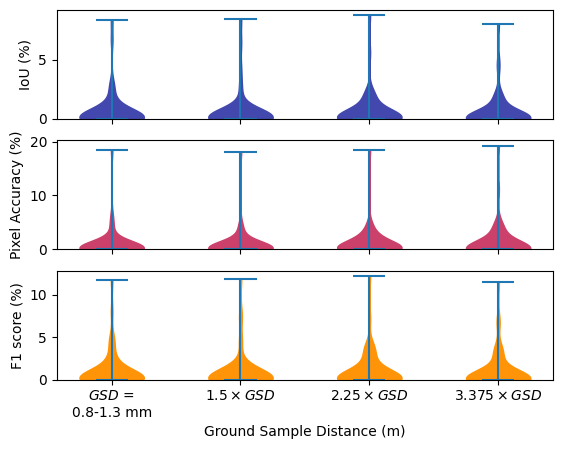

In [5]:
fig, axs = plt.subplots(nrows=3, sharex=True)

ious = [100 * df[df.GSD == gsd].iou for gsd in df.GSD.unique()]
accs = [100 * df[df.GSD == gsd].acc for gsd in df.GSD.unique()]
f1s = [100 * df[df.GSD == gsd].f1 for gsd in df.GSD.unique()]

vio_ious = axs[0].violinplot(ious, showmeans=False)
vio_accs = axs[1].violinplot(accs, showmeans=False)
vio_f1s = axs[2].violinplot(f1s, showmeans=False)
xlabs = ["$GSD$ =\n0.8-1.3 mm", "$1.5\\times GSD$", "$2.25\\times GSD$", "$3.375\\times GSD$"]

for pc_iou in vio_ious["bodies"]:
    pc_iou.set_facecolor("#4248ad")
    pc_iou.set_edgecolor("#4248ad")
    pc_iou.set_alpha(1)

for pc_acc in vio_accs["bodies"]:
    pc_acc.set_facecolor("#cb416b")
    pc_acc.set_edgecolor("#cb416b")
    pc_acc.set_alpha(1)

for pc_f1 in vio_f1s["bodies"]:
    pc_f1.set_facecolor("#ff9408")
    pc_f1.set_edgecolor("#ff9408")
    pc_f1.set_alpha(1)

axs[2].set_xticks([1, 2, 3, 4], xlabs)
axs[2].set_xlabel("Ground Sample Distance (m)")

axs[0].set_ylabel("IoU (%)")
axs[1].set_ylabel("Pixel Accuracy (%)")
axs[2].set_ylabel("F1 score (%)")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)
axs[2].set_ylim(bottom=0)

